In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

Read clean data from .csv file

In [2]:
data=np.genfromtxt("Single Hop Outdoor4.csv",delimiter=",")

Separating temperature and humidity data

The fault labels created are as follows:

*   no fault = 0
*   random fault = 1
*   malfunction fault = 2
*   drift fault = 3
*   bias fault = 4

In [3]:
columns=np.transpose(data)
temperature=columns[3]          #temperature data
humidity=columns[2]             #humidity data
label=columns[4]                #original data label
fault=columns[5]                #fault label corresponding to the type of fault:

Randomly define intervals for faults

In [4]:
#random fault interval
t1=[[2,10],[80,87]]
h1=[[40,45],[70,80]]
#malfunction fault interval
t2=[[12,15],[64,69],[86,90]]
h2=[[31,35],[82,85]]
#drift fault interval
t3=[[44,48],[70,72]]
h3=[[24,27]]
#bias fault interval
t4=[[75,78],[92,98]]
h4=[[14,18],[50,52],[88,96]]

Function to plot 'clean vs fault' induced data

In [5]:
def plot_data(values,faulty,t,x,y):
        plt.figure()
        plt.plot(np.arange(len(faulty)),faulty,color='orange',label="Faulty")
        plt.plot(np.arange(len(values)),values,color='blue',label="Clean")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(t)
        leg = plt.legend()
        plt.show()

Function definition to calculate normal distribution

In [6]:
def normal_distribution(mu,v,sd,x):             #given mean, variance, standard deviation, data 
    pi=3.14159265
    nd=np.exp((((x-mu)/sd)**2)*(-1/2))
    root2pi=(2*pi)**(1/2)
    nd=nd*(1/(sd*root2pi))
    return nd

Make copy of data for plotting purpose

In [7]:
clean_temperature=np.copy(temperature)
faulty_temperature=np.copy(temperature)

clean_humidity=np.copy(humidity)
faulty_humidity=np.copy(humidity)

1. RANDOM FAULT

In [8]:
random_I=[0.15,0.3,0.5,1]               #intensity vector
data_size=temperature.shape[0]
dr=0.2                                  #density parameter

def random_faults(ival,dr,random_I,faulty_data,fault,data_size):
    for interval in ival:
        start=int((interval[0]*data_size)/100)
        end=int((interval[1]*data_size)/100)
        s=faulty_data[start:end]
        for i in range(start,end):
            p=random.randint(0,101)
            r=random.randint(1,len(random_I)-1)
            if p>dr:
                pass
            else:
                x_new=faulty_data[i]*(1+random_I[r])
                faulty_data[i]=x_new
                fault[i]=1
    return(faulty_data)


faulty_temperature=random_faults(t1,dr,random_I,temperature,fault,data_size)
#plot_data(clean_temperature,faulty_temperature)
faulty_humidity=random_faults(h1,dr,random_I,humidity,fault,data_size)
#plot_data(clean_humidity,faulty_humidity)

2. MALFUNCTION FAULT

In [9]:
noise_t=1.5                             #noise intensity value for temperature data
noise_h=2.5                             #noise intensity value for humidity data

def malfun(ival,faulty_data,fault,noise,data_size):
    for interval in ival:
        start=int((interval[0]*data_size)/100)
        end=int((interval[1]*data_size)/100)
        s=faulty_data[start:end]
        v=np.var(s)
        sd=np.std(s)
        m=np.mean(s)
        for i in range(start,end):
            x_new=faulty_data[i]+(normal_distribution(m,v,sd,faulty_data[i])*noise)
            faulty_data[i]=x_new
            fault[i]=2
    return(faulty_data)

faulty_temperature=malfun(t2,temperature,fault,noise_t,data_size)
#plot_data(clean_temperature,faulty_temperature)
faulty_humidity=malfun(h2,humidity,fault,noise_h,data_size)
#plot_data(clean_humidity,faulty_humidity)

3. DRIFT FAULT

In [10]:
drift_I=[-0.5,-1,0.5,1]                 #intensity vector
noise=0.8                               #noise intensity

def drift_fault(ival,drift_I,faulty_data,fault,data_size,noise):
    for interval in ival:
        start=int((interval[0]*data_size)/100)
        end=int((interval[1]*data_size)/100)
        s=faulty_data[start:end]
        r=random.randint(1,len(drift_I)-1)
        v=np.var(s)
        sd=np.std(s)
        m=np.mean(s)
        offset=s[0]*drift_I[r]
        for i in range(start,end):
            x_new=faulty_data[i]+(normal_distribution(m,v,sd,faulty_data[i])*noise)+offset
            faulty_data[i]=x_new
            fault[i]=3
    return(faulty_data)

faulty_temperature=drift_fault(t3,drift_I,temperature,fault,data_size,noise)
#plot_data(clean_temperature,faulty_temperature)
faulty_humidity=drift_fault(h3,drift_I,humidity,fault,data_size,noise)
#plot_data(clean_humidity,faulty_humidity)

4. BIAS FAULT

In [11]:
bias_I=1.1                              #bias intensity
noise=0                                 #noise intensity

def bias_fault(ival,bias_I,faulty_data,fault,data_size,noise):
    for interval in ival:
        start=int((interval[0]*data_size)/100)
        end=int((interval[1]*data_size)/100)
        s=faulty_data[start:end]
        v=np.var(s)
        sd=np.std(s)
        m=np.mean(s)
        new_m=m*bias_I 
        for i in range(start,end):
            x_new=new_m+(normal_distribution(m,v,sd,faulty_data[i])*noise)
            faulty_data[i]=x_new
            fault[i]=4
    return(faulty_data)

faulty_temperature=bias_fault(t4,bias_I,temperature,fault,data_size,noise)
#plot_data(clean_temperature,faulty_temperature)
faulty_humidity=bias_fault(h4,bias_I,humidity,fault,data_size,noise)
#plot_data(clean_humidity,faulty_humidity)

Plot the data: clean vs faulty data

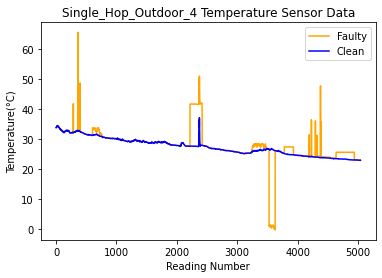

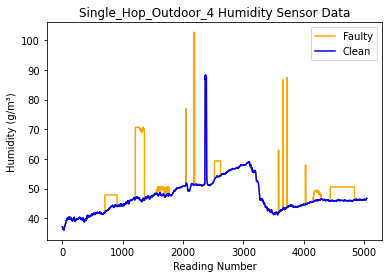

In [12]:
plot_data(clean_temperature,faulty_temperature,"Single_Hop_Outdoor_4 Temperature Sensor Data","Reading Number",u'Temperature(\u00B0C)')
plot_data(clean_humidity,faulty_humidity,"Single_Hop_Outdoor_4 Humidity Sensor Data","Reading Number",f'Humidity (g/m\N{SUPERSCRIPT THREE})')

Save the clean data and faulty data in separate .csv files

In [13]:
np.savetxt('single_outdoor_4_clean.csv', [p for p in zip(clean_temperature, clean_humidity,label)], delimiter=',', fmt='%s')
np.savetxt('single_outdoor_4_faulty.csv', [q for q in zip(faulty_temperature, faulty_humidity,label,fault)], delimiter=',', fmt='%s')